In [2]:
#SVM Classification
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn import svm
from sklearn.svm import SVC   #Support Vector Classifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split, cross_val_score

In [3]:
from google.colab import files
uploaded=files.upload()

Saving mushroom.csv to mushroom.csv


In [4]:
data = pd.read_csv("mushroom.csv")
data

,Unnamed: 0,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,1167,sunken,scaly,white,no,anise,descending,distant,broad,pink,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,1037,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,309,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,282,bell,scaly,pink,yes,fishy,notched,close,broad,orange,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,820,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,863,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,1160,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,265,convex,grooves,green,yes,fishy,notched,close,narrow,pink,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,411,bell,smooth,white,no,pungent,free,close,narrow,orange,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [5]:
data.columns

Index(['Unnamed: 0', 'cap_shape', 'cap_surface', 'cap_color', 'bruises',
       'odor', 'gill_attachment', 'gill_spacing', 'gill_size', 'gill_color',
       'stalk_shape', 'stalk_root', 'stalk_surface_above_ring',
       'stalk_surface_below_ring', 'stalk_color_above_ring',
       'stalk_color_below_ring', 'veil_type', 'veil_color', 'ring_number',
       'ring_type', 'spore_print_color', 'population', 'habitat', 'class',
       'stalk_height', 'cap_diameter'],
      dtype='object')

In [6]:
data.drop(['Unnamed: 0'], axis=1, inplace=True)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,sunken,scaly,white,no,anise,descending,distant,broad,pink,tapering,...,partial,brown,two,sheathing,chocolate,clustered,waste,poisonous,14.276173,5.054983
1,sunken,fibrous,red,no,anise,notched,crowded,narrow,chocolate,enlarging,...,universal,brown,two,sheathing,brown,numerous,waste,edible,3.952715,19.068319
2,flat,grooves,purple,yes,foul,descending,crowded,broad,purple,tapering,...,universal,yellow,two,sheathing,purple,abundant,waste,poisonous,9.054265,7.205884
3,bell,scaly,pink,yes,fishy,notched,close,broad,orange,enlarging,...,partial,yellow,two,cobwebby,green,clustered,grasses,poisonous,5.226499,20.932692
4,flat,smooth,yellow,yes,musty,free,crowded,narrow,orange,enlarging,...,universal,white,none,none,yellow,clustered,urban,poisonous,14.037532,12.545245
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,sunken,scaly,brown,yes,foul,attached,crowded,narrow,chocolate,tapering,...,partial,orange,one,flaring,purple,abundant,leaves,poisonous,5.877891,17.464145
1996,sunken,scaly,purple,yes,musty,attached,distant,narrow,red,tapering,...,partial,white,one,zone,yellow,numerous,waste,poisonous,6.500840,13.501957
1997,convex,grooves,green,yes,fishy,notched,close,narrow,pink,tapering,...,partial,brown,two,evanescent,yellow,abundant,woods,poisonous,13.558064,11.270020
1998,bell,smooth,white,no,pungent,free,close,narrow,orange,enlarging,...,universal,yellow,one,cobwebby,brown,solitary,woods,poisonous,11.092703,8.423199


In [7]:
from sklearn.preprocessing import LabelEncoder



In [8]:
data=data.apply(LabelEncoder().fit_transform)
data

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
0,4,2,7,0,1,1,2,0,7,1,...,0,0,2,6,3,1,5,1,916,190
1,4,0,6,0,1,3,1,1,3,0,...,1,0,2,6,1,2,5,0,128,750
2,3,1,5,1,4,1,1,0,8,1,...,1,3,2,6,6,0,5,1,537,281
3,0,2,4,1,3,3,0,0,6,0,...,0,3,2,0,4,1,0,1,234,829
4,3,3,8,1,5,2,1,1,6,0,...,1,2,0,4,8,1,4,1,895,484
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,4,2,0,1,4,0,1,1,3,1,...,0,1,1,2,6,0,1,1,283,680
1996,4,2,5,1,5,0,2,1,9,1,...,0,2,1,7,8,2,5,1,335,521
1997,2,1,3,1,3,3,0,1,7,1,...,0,0,2,1,8,0,6,1,859,438
1998,0,3,7,0,7,2,0,1,6,0,...,1,3,1,0,1,5,6,1,679,320


In [9]:
data.isnull().sum()

,0
cap_shape,0
cap_surface,0
cap_color,0
bruises,0
odor,0
gill_attachment,0
gill_spacing,0
gill_size,0
gill_color,0
stalk_shape,0


In [10]:
data.describe()

,cap_shape,cap_surface,cap_color,bruises,odor,gill_attachment,gill_spacing,gill_size,gill_color,stalk_shape,...,veil_type,veil_color,ring_number,ring_type,spore_print_color,population,habitat,class,stalk_height,cap_diameter
count,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000,2000.000000,2000.000000,...,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.00000,2000.000000
mean,2.052500,1.556000,3.862000,0.511500,3.988500,1.561500,1.00650,0.503500,5.348000,0.480000,...,0.5050,1.455500,0.990500,3.562000,3.905500,2.458000,3.070000,0.700000,478.79400,476.150500
std,1.435888,1.114668,2.626672,0.499993,2.542361,1.126433,0.81902,0.500113,3.388752,0.499725,...,0.5001,1.117875,0.809776,2.294295,2.619351,1.732263,1.971559,0.458372,281.44026,284.323836
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.0000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000
25%,1.000000,1.000000,2.000000,0.000000,2.000000,1.000000,0.00000,0.000000,2.000000,0.000000,...,0.0000,0.000000,0.000000,2.000000,1.000000,1.000000,1.000000,0.000000,238.00000,227.750000
50%,2.000000,2.000000,4.000000,1.000000,4.000000,2.000000,1.00000,1.000000,5.000000,0.000000,...,1.0000,2.000000,1.000000,4.000000,4.000000,2.000000,3.000000,1.000000,478.50000,462.500000
75%,3.000000,3.000000,6.000000,1.000000,6.000000,3.000000,2.00000,1.000000,8.000000,1.000000,...,1.0000,2.000000,2.000000,6.000000,6.000000,4.000000,5.000000,1.000000,729.25000,734.250000
max,4.000000,3.000000,8.000000,1.000000,8.000000,3.000000,2.00000,1.000000,11.000000,1.000000,...,1.0000,3.000000,2.000000,7.000000,8.000000,5.000000,6.000000,1.000000,972.00000,975.000000


array([[<Axes: title={'center': 'cap_shape'}>,
        <Axes: title={'center': 'cap_surface'}>,
        <Axes: title={'center': 'cap_color'}>,
        <Axes: title={'center': 'bruises'}>,
        <Axes: title={'center': 'odor'}>],
       [<Axes: title={'center': 'gill_attachment'}>,
        <Axes: title={'center': 'gill_spacing'}>,
        <Axes: title={'center': 'gill_size'}>,
        <Axes: title={'center': 'gill_color'}>,
        <Axes: title={'center': 'stalk_shape'}>],
       [<Axes: title={'center': 'stalk_root'}>,
        <Axes: title={'center': 'stalk_surface_above_ring'}>,
        <Axes: title={'center': 'stalk_surface_below_ring'}>,
        <Axes: title={'center': 'stalk_color_above_ring'}>,
        <Axes: title={'center': 'stalk_color_below_ring'}>],
       [<Axes: title={'center': 'veil_type'}>,
        <Axes: title={'center': 'veil_color'}>,
        <Axes: title={'center': 'ring_number'}>,
        <Axes: title={'center': 'ring_type'}>,
        <Axes: title={'center': 'spor

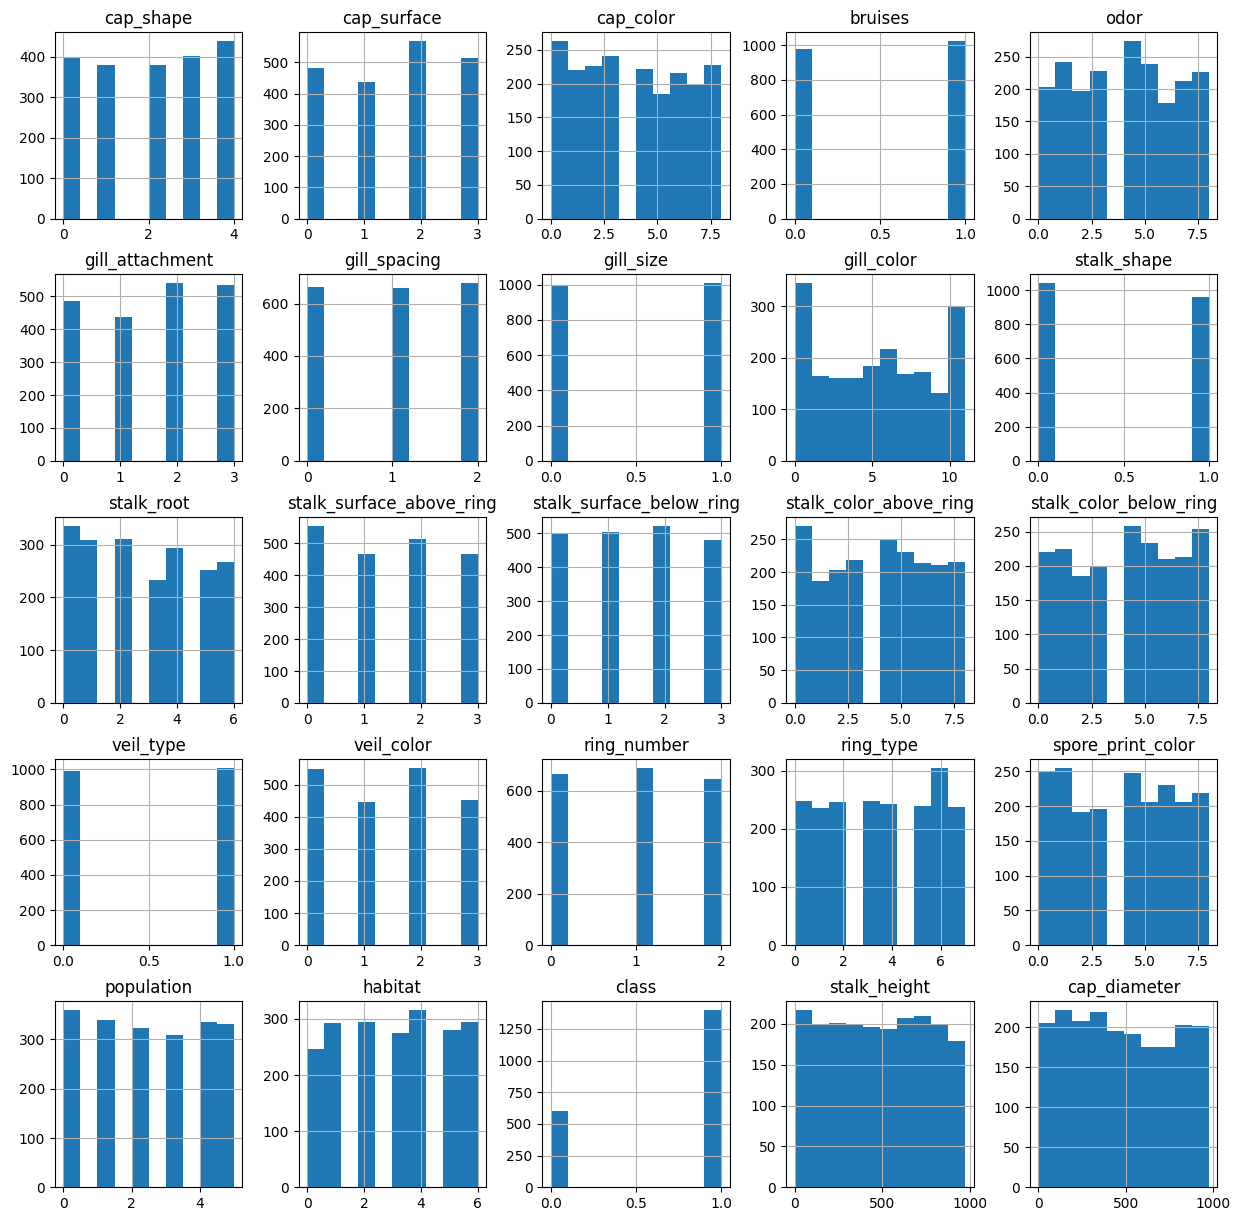

In [11]:
data.hist(figsize=(15,15))

<Axes: >

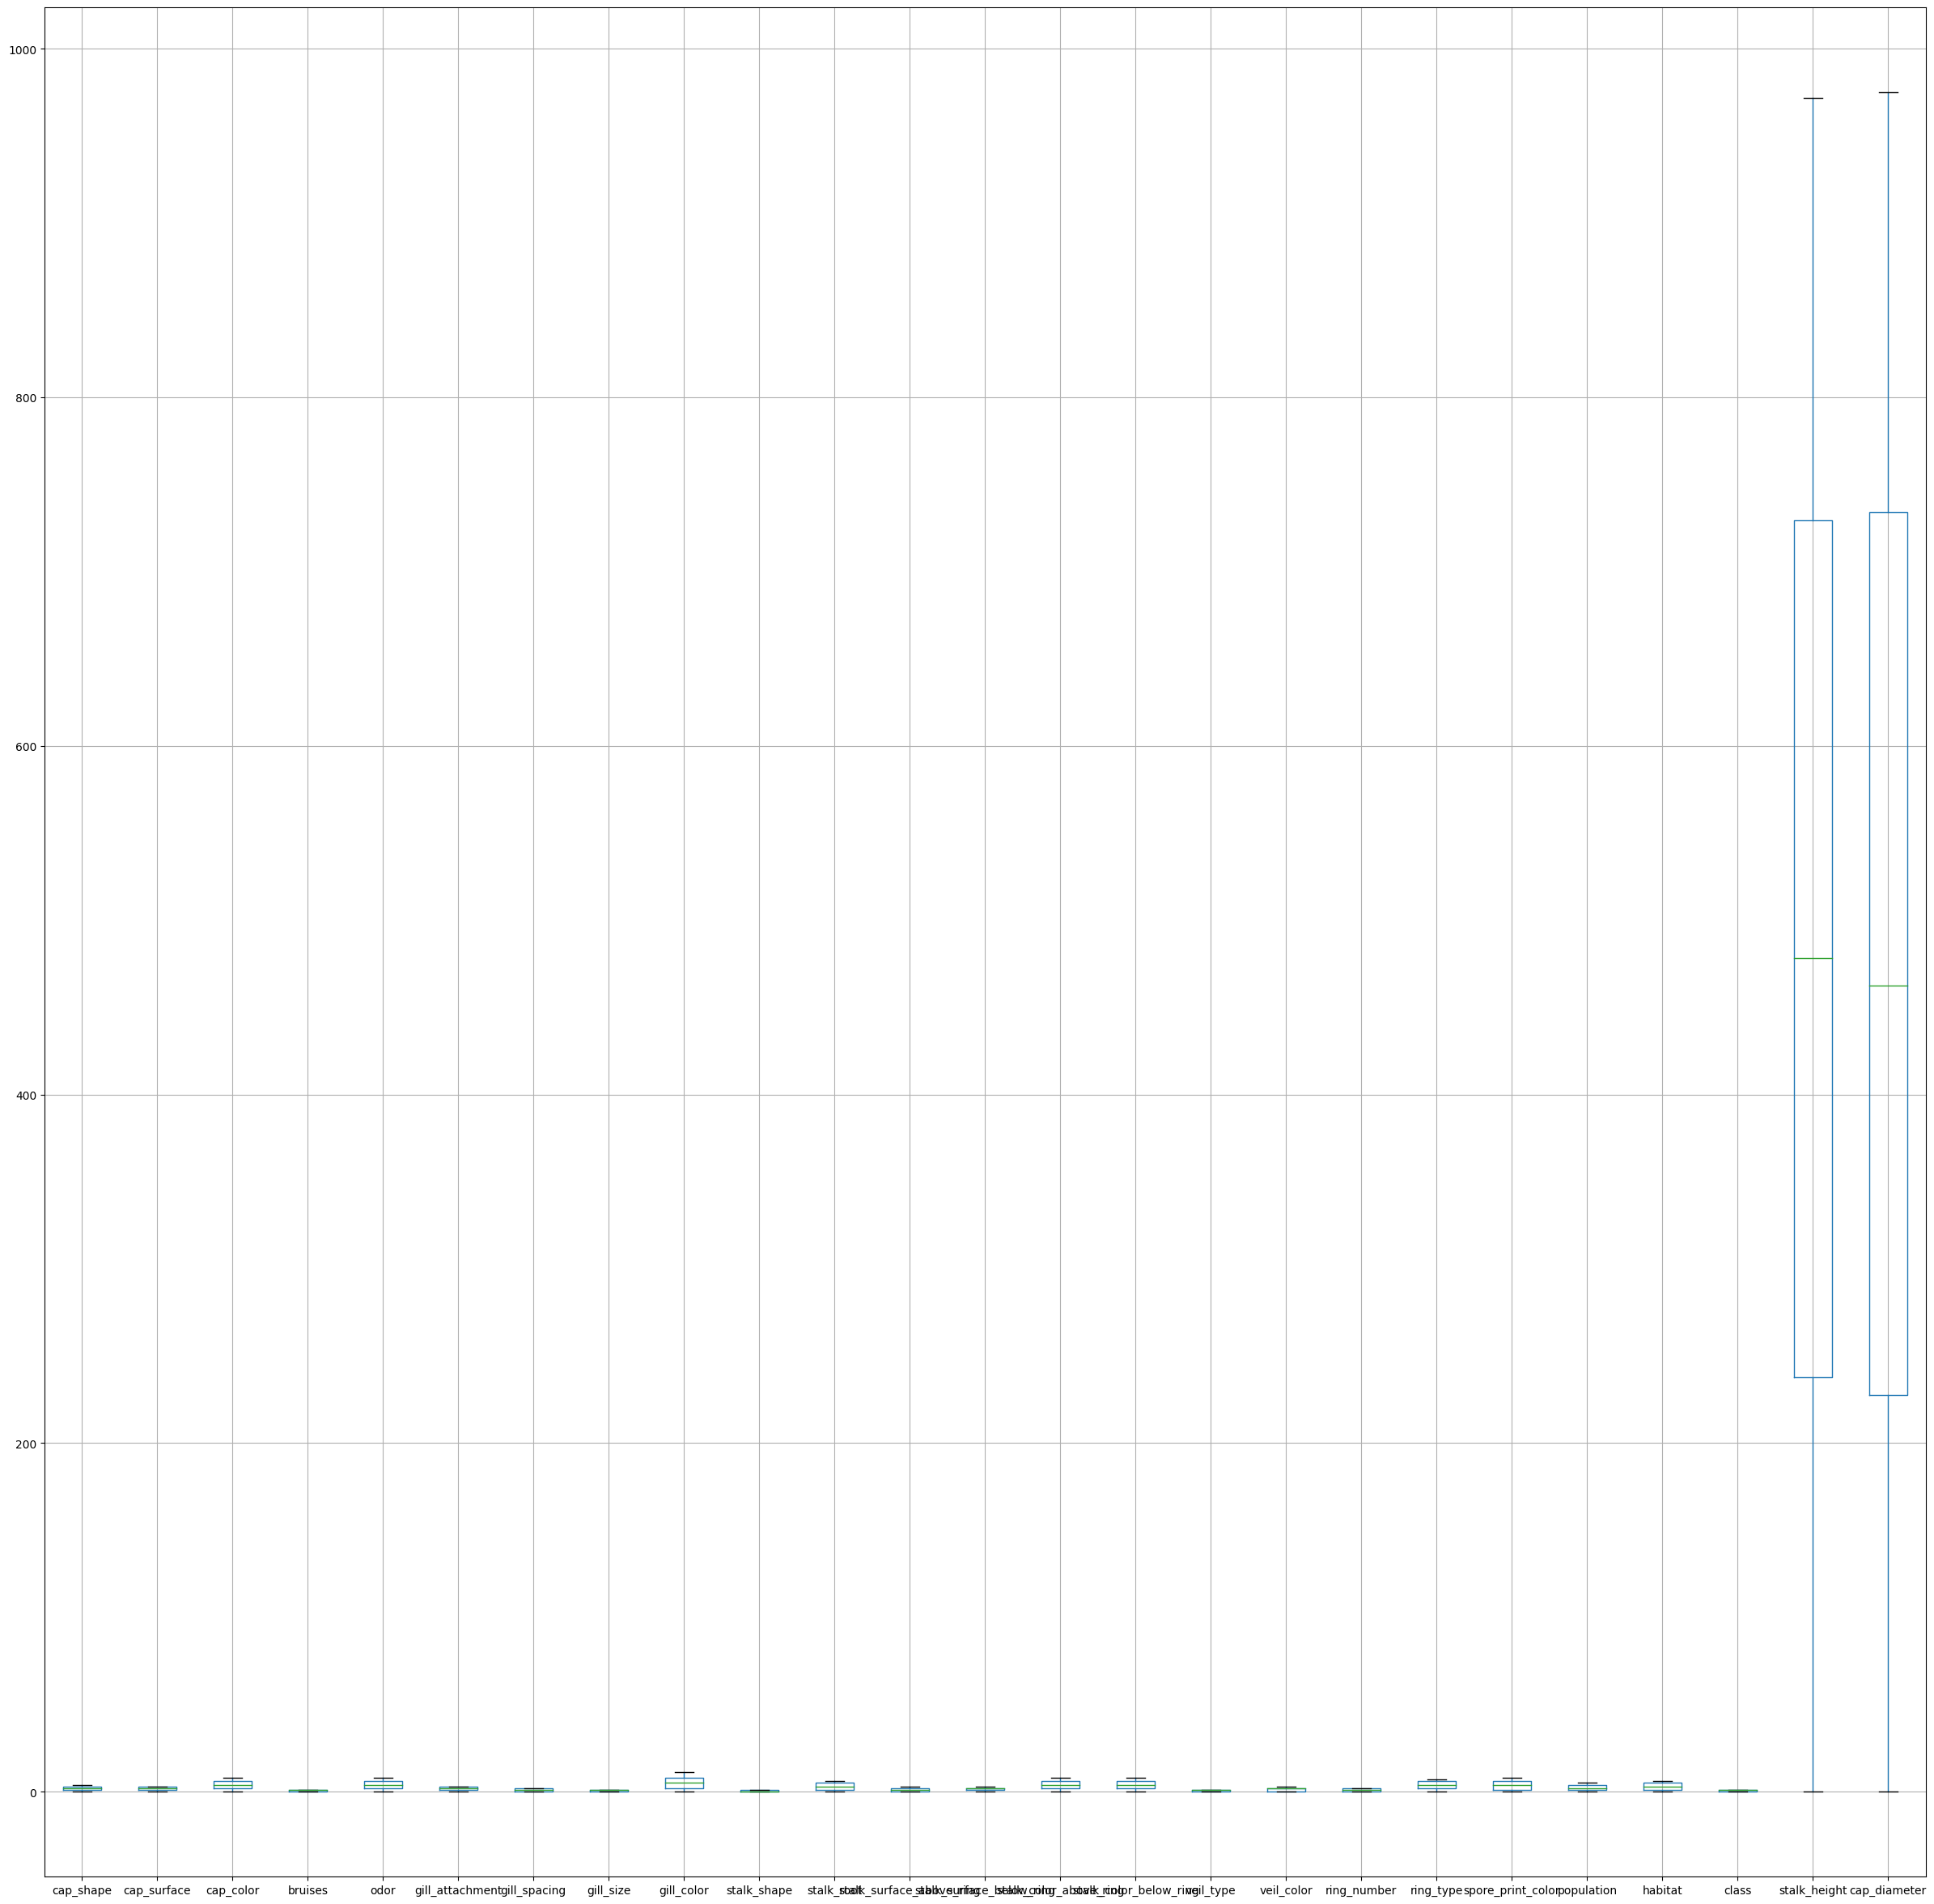

In [12]:
data.boxplot(figsize=(30,30))

In [13]:
# Initialize the StandardScaler
scaler = StandardScaler()
X= data.copy()
# Fit and transform the data
X_scaled = scaler.fit_transform(X)
#Print the scaled data
print(X_scaled)


[[ 1.35664266  0.39842442  1.19496641 ...  0.65465367  1.55384785
  -1.00667629]
 [ 1.35664266 -1.39628018  0.81416131 ... -1.52752523 -1.2467361
   0.96340142]
 [ 0.66003539 -0.49892788  0.43335621 ...  0.65465367  0.20686648
  -0.68653866]
 ...
 [-0.03657188 -0.49892788 -0.328254   ...  0.65465367  1.35126754
  -0.1342133 ]
 [-1.42978643  1.29577672  1.19496641 ...  0.65465367  0.71154024
  -0.54933682]
 [-0.03657188  0.39842442  1.57577151 ...  0.65465367  1.23043016
   1.25187709]]


In [14]:
X=data.iloc[:,0:19]
Y=data.iloc[:,19]

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X,Y, test_size = 0.2)

In [16]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((1600, 19), (1600,), (400, 19), (400,))

In [17]:
# Import the necessary class from scikit-learn
from sklearn.svm import SVC # "Support vector classifier"
from sklearn.model_selection import GridSearchCV # Import GridSearchCV
clf = SVC()
param_grid = [{'kernel':['rbf','sigmoid'],'gamma':[0.5,0.1,0.01,0.001,0.0001],
               'C':[15,14,13,12,11,10,9,8,7,6,5,4,3,2,1,0.1,0.001,0.0001]}]
gsv = GridSearchCV(clf,param_grid,cv=10)
gsv.fit(X,Y)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid=[{'C': [15, 14, 13, 12, 11, 10, 9, 8, 7, 6, 5, 4, 3, 2,
                                1, 0.1, 0.001, 0.0001],
                          'gamma': [0.5, 0.1, 0.01, 0.001, 0.0001],
                          'kernel': ['rbf', 'sigmoid']}])

In [18]:
gsv.best_params_ , gsv.best_score_

({'C': 15, 'gamma': 0.1, 'kernel': 'rbf'}, 0.7945)

In [19]:
clf = SVC(kernel='rbf',C= 15, gamma = 0.01)
clf.fit(X_train , y_train)
y_pred_train= clf.predict(X_train)
acc = accuracy_score(y_train, y_pred_train) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_train, y_pred_train))

Accuracy = 96.1875
[[191   0   0   0   2   1   3   0   3]
 [  2 200   0   1   0   2   1   0   0]
 [  1   0 152   1   1   2   0   1   2]
 [  0   0   0 144   0   0   1   0   5]
 [  2   1   1   0 199   0   0   1   0]
 [  3   1   1   0   3 146   0   0   3]
 [  0   1   2   0   1   1 180   0   0]
 [  1   0   1   0   1   0   1 166   0]
 [  2   0   1   0   0   1   1   2 161]]


In [20]:
y_pred_test = clf.predict(X_test)
acc = accuracy_score(y_test, y_pred_test) * 100
print("Accuracy =", acc)
print(confusion_matrix(y_test, y_pred_test))

Accuracy = 69.75
[[41  1  0  0  0  3  2  1  2]
 [ 4 37  0  0  2  4  0  2  0]
 [ 4  0 22  1  1  0  1  2  1]
 [ 4  4  0 31  2  0  0  2  3]
 [ 4  5  2  1 29  1  1  1  0]
 [ 4  1  1  2  0 37  2  1  0]
 [ 1  3  4  0  2  1 29  1  4]
 [ 4  1  2  1  4  0  1 22  0]
 [ 3  2  3  4  4  2  0  2 31]]
